<a href="https://colab.research.google.com/github/saddam944/bowlingpred/blob/master/Suraia_Jabeen_code_final_SID_DNN%2BGNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
# import all the resources for Natural Language Processing with Python
nltk.download("book")

from gensim.models import Word2Vec
from nltk.corpus import stopwords

import re

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Package conll2002 is already up-to-date!
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package dependency_treebank is already up-to-date!
[nltk_data]    | Downloadi

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import pandas as pd

**CONNECTING TO DRIVE**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**READING DATA FROM DRIVE**

In [ ]:
# Reading the data
path = "/content/drive/MyDrive/Saddam_Sir/Thesis/Dataset/Suicide_twitter_data_final.xlsx"
path1 = "/content/drive/MyDrive/Saddam_Sir/Thesis/Dataset/Reddit-Suicide-Data-Final.xlsx"
path2 = "/content/drive/MyDrive/Saddam_Sir/Thesis/Dataset/Facebook-Suicide-Data-2.xlsx"

df = pd.read_excel(path)
df1 = pd.read_excel(path1)
df2 = pd.read_excel(path2)

**READING DATA FROM SECOND SOURCE**

In [ ]:
df1

,text,sentiment
0,Open-pit coal mining to be suicidal for Bang...,0
1,"Bangladesh police join forces with Meta, Tik...",0
2,VIDEO: Why Kashmiri students protested after...,0
3,least game addict boy in bangladesh. commits...,0
4,Bangladesh's first transgender news reader t...,0
...,...,...
381,Wanting to die so I can restart.,1
382,My ex is having active thoughts and I don't kn...,1
383,Just some sad ex stuff\nI know it’s lame and b...,1
384,I’m corrosive\nI destroy everything i touch. L...,1


**READING DATA FDROM THIRD SOURCE**
)

In [ ]:
df2

,text,sentiment
0,Kashmiri Medical student attempted Suicide i...,1
1,Chattogram Dr. Akash doctor dies by suicide...,1
2,"Trigger Warning: Suicide Abu Mohashin Khan,...",1
3,WARNING - CONFRONTING IMAGES | What really h...,0
4,SAY NO TO SUICIDE! As Let's Talk Mental Heal...,1
...,...,...
73,Before getting yourself involved in cybercrime...,1
74,I Will never forget.. Instead of judging the ...,1
75,"to my brother, thanks for being an as*hole and...",1
76,The beginning of my varsity life was so scary....,1


**READING DATA FROM FIRST SOURCE**

In [ ]:
df

,text,sentiment
0,b'@SmurphySuzanne @Sunderland_GM And more coun...,0
1,b'RT @TatasenkoMana: This Method suicide 18 Da...,0
2,b'RT @ennui365: Why in the name of Vince Foste...,0
3,b'@Alan_G_Smith_BC @diana_murphy613 @JustinTru...,0
4,"b""RT @sidhant: Turkey's mega Antalya Diplomati...",0
...,...,...
316,"b'RT @Bonny:When i had money, everybody was wi...",1
317,"b'RT ""You were with me until i fall into a dee...",1
318,"b'RT ""Everything is a lie in this world.goodby...",1
319,"b'RT ""Tell me what can i do? i can't bear it a...",1


**APPENDING DATA IN ONE DATAFRAME**

In [ ]:
import pandas as pd

# Assuming df, df1, and df2 are already defined

# Check DataFrame Structure
assert isinstance(df, pd.DataFrame), "df is not a pandas DataFrame"
assert isinstance(df1, pd.DataFrame), "df1 is not a pandas DataFrame"
assert isinstance(df2, pd.DataFrame), "df2 is not a pandas DataFrame"

# Check Column Names
assert 'text' in df1.columns and 'sentiment' in df1.columns, "Columns 'text' and 'sentiment' not found in df1"
assert 'text' in df2.columns and 'sentiment' in df2.columns, "Columns 'text' and 'sentiment' not found in df2"

# Make a copy of df
df3 = df.copy()

# Append df1 to df3
for ind in df1.index:
    df3 = pd.concat([df3, pd.DataFrame({'text': [df1['text'][ind]], 'sentiment': [df1['sentiment'][ind]]})], ignore_index=True)

# Append df2 to df3
for ind in df2.index:
    df3 = pd.concat([df3, pd.DataFrame({'text': [df2['text'][ind]], 'sentiment': [df2['sentiment'][ind]]})], ignore_index=True)

print("Shape of df1:", df1.shape)
print("Shape of df3:", df3.shape)



Shape of df1: (386, 2)
Shape of df3: (785, 2)


In [ ]:
df3['sentiment']

0      0
1      0
2      0
3      0
4      0
      ..
780    1
781    1
782    1
783    1
784    1
Name: sentiment, Length: 785, dtype: int64

In [ ]:
# Write the DataFrame to a CSV file
df3['sentiment'].to_csv('label.csv', index=False)

In [ ]:
df3['text'][418]

'  Bangladesh Protests Sexual Harassment as Victims Commit Suicide'

In [ ]:
def preprocess(paragraph):
    text = re.sub(r'\[[0-9]*\]',' ',paragraph)
    text = re.sub(r'\s+',' ',text)
    text = text.lower()
    text = re.sub(r'\d',' ',text)
    text = re.sub(r'\s+',' ',text)
    return text

In [ ]:
def sent_tok(paragraph):
  # sentences tokenize
  sentences = nltk.sent_tokenize(paragraph)
  # print(sentences)
  # tf_sen = sentences
  return sentences

In [ ]:
# Function to convert NLTK POS tags to WordNet POS tags
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None  # return None if no mapping found

In [ ]:
def process_data(text):
    # Initialize lemmatizer
    lemmatizer = WordNetLemmatizer()

    # Tokenize the text
    tokens = word_tokenize(text)

    # Get Part-of-Speech tags for each token
    pos_tags = nltk.pos_tag(tokens)

    # Lemmatize each token with its POS tag
    lemmatized_tokens = []
    for token, pos_tag in pos_tags:
        wordnet_pos = get_wordnet_pos(pos_tag) or wordnet.NOUN  # Assume noun as default
        lemmatized_token = lemmatizer.lemmatize(token, pos=wordnet_pos)
        lemmatized_tokens.append(lemmatized_token)

    return lemmatized_tokens

In [ ]:
df3['text'] = df3['text'].astype(str)
df3['text'][510]

'I did the same thing a few days ago but the pain was unbearable and i somehow chickened out. I’m sick and tired of fighting my demons and having to work and put effort for a life that I don’t even want. I’m going to be gone by the end of this year enough is enough.'

In [ ]:
df3['cleaned'] = df3['text'].apply(func = preprocess)
df3['text'][510]

'I did the same thing a few days ago but the pain was unbearable and i somehow chickened out. I’m sick and tired of fighting my demons and having to work and put effort for a life that I don’t even want. I’m going to be gone by the end of this year enough is enough.'

In [ ]:
from nltk.corpus import wordnet

In [ ]:
df3['cleaned'] = df3.cleaned.apply(func = process_data)
df3['cleaned'][510]

['i',
 'do',
 'the',
 'same',
 'thing',
 'a',
 'few',
 'day',
 'ago',
 'but',
 'the',
 'pain',
 'be',
 'unbearable',
 'and',
 'i',
 'somehow',
 'chickened',
 'out',
 '.',
 'i',
 '’',
 'm',
 'sick',
 'and',
 'tire',
 'of',
 'fight',
 'my',
 'demon',
 'and',
 'have',
 'to',
 'work',
 'and',
 'put',
 'effort',
 'for',
 'a',
 'life',
 'that',
 'i',
 'don',
 '’',
 't',
 'even',
 'want',
 '.',
 'i',
 '’',
 'm',
 'go',
 'to',
 'be',
 'go',
 'by',
 'the',
 'end',
 'of',
 'this',
 'year',
 'enough',
 'be',
 'enough',
 '.']

In [ ]:
# df3['cleaned'] = df3.cleaned.apply(func = sent_tok)
# df3['cleaned'][510]

In [ ]:
df3['text'][420]

'  How would your life be simply without music?'

In [ ]:
df3['cleaned'][442]

['[',
 'tumblr',
 ']',
 'sing',
 'a',
 'song',
 'of',
 'sixpenceee',
 ':',
 'the',
 'tale',
 'of',
 'fake',
 'therapy',
 'scam',
 'and',
 'child',
 'slavery']

In [ ]:
df3.shape

(785, 3)

In [ ]:
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

In [ ]:
!pip install tensorflow==2.15.1

In [ ]:
# import gensim.models.keyedvectors as word2vec #need to use due to depreceated model
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

from keras.models import Sequential
from tensorflow.keras.layers import Dense
# from keras.layers.embeddings import Embedding
from keras.layers import Embedding
# from keras.preprocessing.sequence import pad_sequences
from keras.utils import pad_sequences
# from keras.preprocessing.text import Tokenizer
from keras.layers import LSTM

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve,  roc_auc_score, classification_report

import re
import logging

**DATA PRE-PROCESSING, TF-IDF AND LSI**

In [ ]:
#and use regular expression to keep only letters we will use nltk Regular expression package
tkr = RegexpTokenizer('[a-zA-Z@]+')

text_split = []
cnt = 0
for x in df3['cleaned']:
    # print(x)

    text = str(x).lower().split()
    text = tkr.tokenize(str(text))
    # text_split.append(text)

    tfidf = TfidfVectorizer(stop_words='english')

    response = tfidf.fit_transform(x)

    # print (tfidf.get_feature_names_out())
    # Define the number of topics or components
    num_components=2

    # Create SVD object
    lsa = TruncatedSVD(n_components=num_components, n_iter=100, random_state=42)

    # Fit SVD model on data
    lsa.fit_transform(response)

    # Get Singular values and Components
    Sigma = lsa.singular_values_
    V_transpose = lsa.components_.T

    # Print the topics with their terms
    terms = tfidf.get_feature_names_out()
    # print(terms)

    # print(cnt)
    cnt += 1
    temp = []
    for index, component in enumerate(lsa.components_):
        zipped = zip(terms, component)
        top_terms_key=sorted(zipped, key = lambda t: t[1], reverse=True)[:3]
        top_terms_list=list(dict(top_terms_key).keys())
        print("Topic "+str(index)+": ",top_terms_list)
        temp = temp + top_terms_list

    text_split.append(text+temp)

# print(cnt)
# print(text_split[1:2])
# print(tems)
# print(top_terms_list)

Topic 0:  ['russia', 'path', 'bound']
Topic 1:  ['month', 'universe', 'path']
Topic 0:  ['world', 'felt', 'xe']
Topic 1:  ['die', 'ango', 'dazai']
Topic 0:  ['capitol', 'xa', 'rt']
Topic 1:  ['foster', 'hear', 'ennui']
Topic 0:  ['drive', 'suicide', 'alan_g_smith_bc']
Topic 1:  ['alan_g_smith_bc', 'diana_murphy', 'drive']
Topic 0:  ['pakistan', 'minister', 'bangladesh']
Topic 1:  ['forum', 'xa', 'foreign']
Topic 0:  ['servant', 'think', 'serve']
Topic 1:  ['sexual', 'need', 'commit']
Topic 0:  ['xe', 'know', 'yr']
Topic 1:  ['ve', 'refugee', 'room']
Topic 0:  ['krauseforiowa', 'cult', 'vaccine']
Topic 1:  ['vaccine', 'estimate', 'koolaid']
Topic 0:  ['releasetheayercut', 'xf', 'vafxcvzyao']
Topic 1:  ['http', 'suicide', 'scene']
Topic 0:  ['suicide', 'xe', 'thought']
Topic 1:  ['yoonkookau', 'meet', 'suicide']
Topic 0:  ['xe', 'le', 'stop']
Topic 1:  ['xa', 'create', 'ncorporation']
Topic 0:  ['matter', 'word', 'young']
Topic 1:  ['young', 'matter', 'consider']
Topic 0:  ['data', 'outr

**TOTAL LENGTH OF DATA**

In [ ]:
len(text_split)

785

**PRE-TRAINED WORD2VEC MODELB OF GOOGLE READING FROM DRIVE**

In [ ]:
'''
Use pretrained Word2Vec model from google but trim the word list to 50,0000 compared to 300,000 in the original
Google pretrained model
'''
from gensim.models import KeyedVectors

# Load the Word2Vec model
w2vModel = KeyedVectors.load_word2vec_format('/content/drive/MyDrive/Pattern/Lab/Project/word2vec/GoogleNews-vectors-negative300.bin.gz', binary=True, limit=50000)


# w2vModel = word2vec.KeyedVectors.load_word2vec_format('/content/drive/MyDrive/Pattern/Lab/Project/word2vec/GoogleNews-vectors-negative300.bin.gz', binary=True, limit=50000)

In [ ]:
binary_labels =df3['sentiment']

In [ ]:
!pip install Keras

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer


In [ ]:
#Convert words to integers
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_split)
X = tokenizer.texts_to_sequences(text_split)
# X[10]
# X.shape[1]
L = len(max(X, key=len))
L

1670

In [ ]:
#lenght of tweet to consider
maxlentweet = L
#add padding
X = pad_sequences(X, maxlen=maxlentweet)
print(X.shape)
X

(785, 1670)


array([[   0,    0,    0, ...,  183, 1268, 1266],
       [   0,    0,    0, ...,   69, 1711, 1710],
       [   0,    0,    0, ..., 1269,  449, 1712],
       ...,
       [   0,    0,    0, ..., 4357, 2527, 4358],
       [   0,    0,    0, ...,  701,   55,  597],
       [   0,    0,    0, ..., 1707, 2530,   37]], dtype=int32)

In [ ]:
# w2vModel.syn0.shape

# Access the word vectors directly
vectors = w2vModel.vectors

# Get the shape of the word vectors
shape = vectors.shape
print(shape)

(50000, 300)


# Bert

# New Section

In [ ]:
!pip install tensorflow-text==2.15.0

In [ ]:
import pickle
import os
import pandas as pd
import random as rn
import numpy as np
from google.colab import drive
from sklearn.preprocessing import LabelBinarizer
# from tensorflow.regularizer import l1,l2
from tqdm import tqdm
import heapq
from sklearn.utils import shuffle
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import RegexpTokenizer
import re

import tensorflow as tf
import tensorflow_text as text

from sklearn.model_selection import train_test_split
# from tensorflow.keras.utils import load_img, img_to_array

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['shuffle', 'text', 'shape']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [ ]:
!pip install tensorflow-hub==0.15.0

In [ ]:
!pip install tensorflow-hub tf_keras

In [ ]:
!pip install KerasLayer

ERROR: Could not find a version that satisfies the requirement KerasLayer (from versions: none)
ERROR: No matching distribution found for KerasLayer


In [ ]:
import tensorflow as tf
# import tensorflow_hub as hub

print("TensorFlow version:", tf.__version__)
# print("TensorFlow Hub version:", hub.__version__)


TensorFlow version: 2.15.1


In [ ]:
!pip show tensorflow-hub


Name: tensorflow-hub
Version: 0.15.0
Summary: TensorFlow Hub is a library to foster the publication, discovery, and consumption of reusable parts of machine learning models.
Home-page: https://github.com/tensorflow/hub
Author: Google LLC
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, protobuf
Required-by: tensorflow-text


In [ ]:
import tensorflow_hub as hub

print("TensorFlow Hub version:", hub.__version__)

TensorFlow Hub version: 0.15.0


In [ ]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [ ]:
def get_sentence_embeding(sentences):
    preprocessed_text = bert_preprocess(sentences)
    return bert_encoder(preprocessed_text)['pooled_output']

get_sentence_embeding([
    "500$ discount. hurry up",
    "Bhavin, are you up for a volleybal game tomorrow?"]
)

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.843517  , -0.5132727 , -0.8884572 , ..., -0.7474886 ,
        -0.75314724,  0.91964495],
       [-0.8720834 , -0.50543964, -0.94446665, ..., -0.8584749 ,
        -0.7174534 ,  0.88082975]], dtype=float32)>

In [ ]:
text = []

for i in df3['cleaned']:
    string = ""
    for j in i:
        string += j
    text.append(string)

text[0]

"b'@smurphysuzanne@sunderland_gmandmorecountrywillalignwithrussiaandchinainthenextfewmonth.itbethewestthatbeonasuicidepath.westernpoliticianhubrisknownobound.theyreallybelievetheybemasteroftheuniverse.'"

In [ ]:
bert_embed = get_sentence_embeding(text)

In [ ]:
bert_embed

<tf.Tensor: shape=(785, 768), dtype=float32, numpy=
array([[-0.32935375, -0.15666994, -0.2501714 , ...,  0.11209126,
        -0.45407778,  0.44354537],
       [-0.5577115 , -0.27584428, -0.3277408 , ..., -0.27733937,
        -0.64225185,  0.7567291 ],
       [-0.28208378, -0.2240554 , -0.37278756, ..., -0.32295296,
        -0.58725214,  0.62646186],
       ...,
       [-0.55351484, -0.29850733, -0.32068196, ..., -0.08490788,
        -0.56487507,  0.59934056],
       [-0.40220118, -0.20366985, -0.65784806, ..., -0.49699476,
        -0.5037736 ,  0.44894192],
       [-0.66127074, -0.29605785, -0.67903805, ..., -0.37591705,
        -0.56469625,  0.7503463 ]], dtype=float32)>

In [ ]:
bert_embed = bert_embed.numpy()
bert_embed.shape

(785, 768)

In [ ]:
type(bert_embed)

numpy.ndarray

**LSTM**

In [ ]:
#create a embedding layer using Google pre triained word2vec (50000 words)
# embedding_layer = Embedding(input_dim=w2vModel.syn0.shape[0], output_dim=w2vModel.syn0.shape[1], weights=[w2vModel.syn0],
#                             input_length=X.shape[1])

#

# Load the Word2Vec model using Gensim
from gensim.models import KeyedVectors

# Load the Word2Vec model
w2vModel = KeyedVectors.load_word2vec_format('/content/drive/MyDrive/Pattern/Lab/Project/word2vec/GoogleNews-vectors-negative300.bin.gz', binary=True, limit=50000)

# Example: Get the vector for a specific word
# word_vector = w2vModel['example_word']


In [ ]:
# Assuming X is a sequence of word indices (e.g., created using Tokenizer)
embedding_layer = Embedding(input_dim=len(w2vModel.index_to_key), output_dim=w2vModel.vector_size, input_length=X.shape[1])


In [ ]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential

# Assuming you've already defined your `embedding_layer`
# Create a Sequential model and add the embedding layer to it
model = Sequential()
model.add(embedding_layer)

# Get a summary of the model to see the parameters in the Embedding layer
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1670, 300)         15000000  
                                                                 
Total params: 15000000 (57.22 MB)
Trainable params: 15000000 (57.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#create model

lstm_out = 80

model = Sequential()
model.add(embedding_layer)
model.add(LSTM(units=lstm_out))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1670, 300)         15000000  
                                                                 
 lstm (LSTM)                 (None, 80)                121920    
                                                                 
 dense (Dense)               (None, 1)                 81        
                                                                 
Total params: 15122001 (57.69 MB)
Trainable params: 15122001 (57.69 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
df3['sentiment'].shape

(785,)

In [ ]:
#split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, df3['sentiment'], test_size= 0.1, random_state = 24)

In [ ]:
#fit model
batch_size = 32
model.fit(X_train, Y_train, epochs=6, verbose=1, batch_size=batch_size)

Epoch 1/6
23/23 [==============================] - 9s 252ms/step - loss: 0.5590 - accuracy: 0.7337
Epoch 2/6
23/23 [==============================] - 7s 305ms/step - loss: 0.2348 - accuracy: 0.9207
Epoch 3/6
23/23 [==============================] - 10s 414ms/step - loss: 0.0990 - accuracy: 0.9731
Epoch 4/6
23/23 [==============================] - 4s 159ms/step - loss: 0.0509 - accuracy: 0.9844
Epoch 5/6
23/23 [==============================] - 5s 215ms/step - loss: 0.0215 - accuracy: 0.9958
Epoch 6/6
23/23 [==============================] - 4s 175ms/step - loss: 0.0195 - accuracy: 0.9958


In [ ]:
#analyze the results
score, acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size=batch_size)
y_pred = model.predict(X_test)

3/3 - 1s - loss: 0.5325 - accuracy: 0.8608 - 557ms/epoch - 186ms/step
3/3 [==============================] - 0s 31ms/step


In [ ]:
threshold = 0.5  # Set the threshold for classification

# Assuming y_pred contains probability scores, convert to binary labels
y_pred_binary = (y_pred >= threshold).astype(int)

# Now, you can use classification metrics on y_test and y_pred_binary


In [ ]:
# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# conf_matrix = confusion_matrix(y_test, y_pred)
# report = classification_report(y_test, y_pred)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming you have already defined y_test and y_pred

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred_binary)
conf_matrix = confusion_matrix(Y_test, y_pred_binary)
report = classification_report(Y_test, y_pred_binary)


In [ ]:
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

Accuracy: 0.8607594936708861
Confusion Matrix:
 [[41  7]
 [ 4 27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.85      0.88        48
           1       0.79      0.87      0.83        31

    accuracy                           0.86        79
   macro avg       0.85      0.86      0.86        79
weighted avg       0.87      0.86      0.86        79



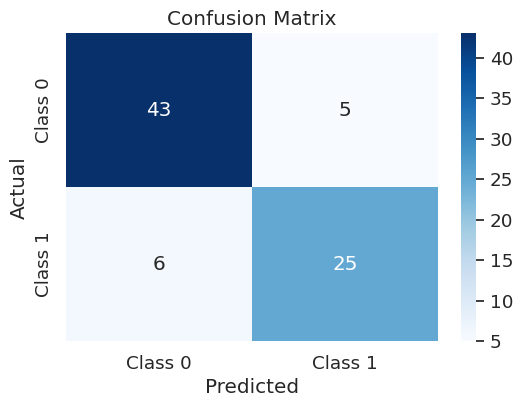

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Replace these values with your own
conf_matrix2 = np.array(conf_matrix)
# conf_matrix = np.array([[33, 4], [17, 9]])
classes = ['Class 0', 'Class 1']

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.set(font_scale=1.2)  # Adjust font size as needed
sns.heatmap(conf_matrix2, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


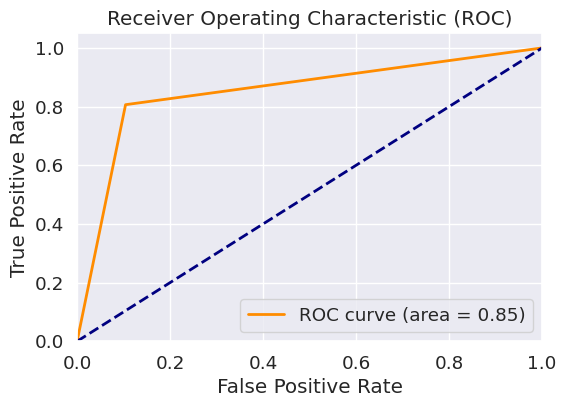

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have y_pred_probs for predicted probabilities and y_test for true labels

# Calculate ROC curve for Class 1 (assuming binary classification)
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_binary)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

BERT+word2vec

*word2vec*

In [ ]:
#
import gensim
import numpy as np

# Preprocess texts and obtain a list of lists of words
# text_split = [["this", "is", "the", "first", "sentence"], ["this", "is", "the", "second", "sentence"]]

# Train word embeddings using Word2Vec model
model = gensim.models.Word2Vec(text_split, vector_size=100, window=5, min_count=1, workers=4)

# Obtain sentence embeddings by taking the average of word embeddings
sentence_embeddings = []
for text in text_split:
    embeddings = []
    for word in text:
        if word in model.wv.key_to_index:  # Check if the word exists in the vocabulary
            embeddings.append(model.wv[word])
    if len(embeddings) > 0:
        sentence_embeddings.append(np.mean(embeddings, axis=0))  # Calculate the mean of word embeddings
    else:
        sentence_embeddings.append(np.zeros(model.vector_size))  # Use zeros if no valid word embeddings are found


In [ ]:
wor2vec_embeddings = np.array(sentence_embeddings)
wor2vec_embeddings.shape

(785, 100)

In [ ]:
wor2vec_embeddings[0]

array([ 0.03656434,  0.21833362,  0.1385378 ,  0.25651816,  0.28121233,
       -0.5691477 ,  0.3841561 ,  0.9979726 , -0.05116224, -0.4206317 ,
        0.06041259, -0.52382845, -0.3372437 ,  0.34415564, -0.17316534,
       -0.29191205, -0.09943359, -0.41029078, -0.15140785, -0.7429085 ,
       -0.04956472,  0.26036415,  0.43282783, -0.15092155, -0.05092929,
        0.25182208, -0.4653744 ,  0.02767959, -0.31119892,  0.28072003,
        0.2916401 , -0.0340243 ,  0.14403903, -0.01775441, -0.42171124,
        0.6062271 , -0.1654427 , -0.39411888, -0.17443967, -0.57925075,
        0.25394642, -0.50374764, -0.30966386, -0.01804875,  0.5125289 ,
       -0.31982478, -0.23876235, -0.41694027,  0.4722674 ,  0.22437477,
       -0.01455363, -0.47059616,  0.06047519,  0.12030023,  0.00761491,
        0.23328458,  0.2134186 , -0.1249446 , -0.27591994,  0.21696933,
       -0.17586482,  0.01405965,  0.00681644, -0.11750092, -0.6772109 ,
        0.3521564 , -0.13826276,  0.2938416 , -0.56031966,  0.38

*BERT*

In [ ]:
!pip install transformers

In [ ]:
from transformers import AutoTokenizer, TFAutoModel
import tensorflow as tf

# Load the pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = TFAutoModel.from_pretrained(model_name)

# Define the list of texts for which we need to get sentence embeddings
texts = ["this is the first sentence", "this is the second sentence"]

# Tokenize the input texts
tokenized_texts = [tokenizer.encode(text, add_special_tokens=True) for text in texts]

# Pad and truncate the tokenized sequences to a common length
max_length = 64
padded_tokenized_texts = [t + [0]*(max_length-len(t)) if len(t) < max_length else t[:max_length] for t in tokenized_texts]

# Convert the padded sequences to tensors
input_ids = tf.constant(padded_tokenized_texts)

# Obtain the BERT embeddings for the `[CLS]` token
bert_embeddings = model(input_ids)[0][:, 0, :].numpy().tolist()


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
from transformers import AutoTokenizer, TFAutoModel

# Load the pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = TFAutoModel.from_pretrained(model_name)

# Print the model summary
model.summary()


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Model: "tf_bert_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
Total params: 109482240 (417.64 MB)
Trainable params: 109482240 (417.64 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
binary_labels.shape

(785,)

Merge BERT + wordvec

In [ ]:
import numpy as np

# Assume wor2vec_embeddings has shape (n_samples, 100)
# Assume bert_embed has shape (n_samples, 768)

# Extend wor2vec_embeddings with zeros to match dimensions
num_samples = wor2vec_embeddings.shape[0]
num_columns_to_add = 768 - 100  # Adjust as needed

# Pad with zeros along the second axis
wor2vec_embeddings_extended = np.pad(wor2vec_embeddings, ((0, 0), (0, num_columns_to_add)), 'constant')

# Concatenate along the first axis
merged_embed = np.concatenate([wor2vec_embeddings_extended, bert_embed], axis=0)



In [ ]:
# Now, you can use lstm_features_train for visualization or any further analysis
print("LSTM Feature Vectors (Training):", merged_embed)

LSTM Feature Vectors (Training): [[ 0.03656434  0.21833362  0.1385378  ...  0.          0.
   0.        ]
 [ 0.03225324  0.19782054  0.20326662 ...  0.          0.
   0.        ]
 [ 0.03456775  0.16281417  0.19144759 ...  0.          0.
   0.        ]
 ...
 [-0.55351484 -0.29850733 -0.32068196 ... -0.08490788 -0.56487507
   0.59934056]
 [-0.40220118 -0.20366985 -0.65784806 ... -0.49699476 -0.5037736
   0.44894192]
 [-0.66127074 -0.29605785 -0.67903805 ... -0.37591705 -0.56469625
   0.7503463 ]]


In [ ]:
# Calculate the number of parameters
num_parameters = merged_embed.size

In [ ]:
print("LSTM Feature Vectors size (Training):", num_parameters)

LSTM Feature Vectors size (Training): 1205760


In [ ]:

# Calculate the number of parameters
num_parameters = merged_embed.size

# Create a parameter table
parameter_table = [
    ["Embedding Type", "Shape", "Number of Parameters"],
    ["Word2Vec", wor2vec_embeddings_extended.shape, wor2vec_embeddings_extended.size],
    ["BERT", bert_embed.shape, bert_embed.size],
    ["Merged", merged_embed.shape, num_parameters]
]

# Display the parameter table
print("{:<15} {:<20} {:<15}".format("Embedding Type", "Shape", "Number of Parameters"))
for row in parameter_table[1:]:
    embedding_type, shape, num_params = row
    print(f"{embedding_type:<15} {str(shape):<20} {num_params:<15}")


Embedding Type  Shape                Number of Parameters
Word2Vec        (785, 768)           602880         
BERT            (785, 768)           602880         
Merged          (1570, 768)          1205760        


In [ ]:
# Split the data and preprocess it
X_train, X_test, y_train, y_test = train_test_split(wor2vec_embeddings_extended, binary_labels, test_size=0.2, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(bert_embeddings, binary_labels, test_size=0.2, random_state=42)

In [ ]:
columns = []

for i in range(868):
    columns.append(i)

len(columns)

868

In [ ]:
# # convert to a DataFrame
# df = pd.DataFrame(merged_embed, columns=columns)

# Assuming merged_embed has shape (1246, 768)
# columns should be a list of column names with 768 elements
columns = [f"column_{i}" for i in range(768)]

# Create the DataFrame
df = pd.DataFrame(merged_embed, columns=columns)

df.head(5)

,column_0,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,...,column_758,column_759,column_760,column_761,column_762,column_763,column_764,column_765,column_766,column_767
0,0.036564,0.218334,0.138538,0.256518,0.281212,-0.569148,0.384156,0.997973,-0.051162,-0.420632,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.032253,0.197821,0.203267,0.292875,0.311066,-0.599398,0.391063,1.120264,-0.018819,-0.493481,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.034568,0.162814,0.191448,0.260829,0.279162,-0.528359,0.341305,0.993970,-0.003587,-0.446183,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.042560,0.168587,0.130679,0.219823,0.261462,-0.463100,0.320594,0.828719,-0.023770,-0.356276,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.025282,0.112338,0.178910,0.221880,0.235676,-0.416479,0.267579,0.823004,0.014731,-0.376754,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df

,column_0,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,...,column_758,column_759,column_760,column_761,column_762,column_763,column_764,column_765,column_766,column_767
0,0.036564,0.218334,0.138538,0.256518,0.281212,-0.569148,0.384156,0.997973,-0.051162,-0.420632,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.032253,0.197821,0.203267,0.292875,0.311066,-0.599398,0.391063,1.120264,-0.018819,-0.493481,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.034568,0.162814,0.191448,0.260829,0.279162,-0.528359,0.341305,0.993970,-0.003587,-0.446183,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.042560,0.168587,0.130679,0.219823,0.261462,-0.463100,0.320594,0.828719,-0.023770,-0.356276,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.025282,0.112338,0.178910,0.221880,0.235676,-0.416479,0.267579,0.823004,0.014731,-0.376754,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565,-0.594592,-0.265427,-0.370284,0.449403,-0.049620,-0.060405,0.487752,0.236381,0.091387,-0.999658,...,0.572614,0.136991,-0.035602,0.749789,0.340442,0.483130,0.651838,-0.070919,-0.586213,0.633905
1566,-0.689070,-0.223740,-0.323642,0.459615,0.004207,-0.045441,0.639157,0.049712,-0.081533,-0.999701,...,0.526577,0.298951,0.235158,0.790037,0.156687,0.480044,0.625669,0.069269,-0.543947,0.741714
1567,-0.553515,-0.298507,-0.320682,0.284395,-0.121845,-0.063109,0.438248,0.223991,0.101273,-0.999505,...,0.488431,0.185630,-0.185045,0.688859,0.360062,0.435166,0.601390,-0.084908,-0.564875,0.599341
1568,-0.402201,-0.203670,-0.657848,0.335423,0.177897,-0.057202,0.291916,0.173513,-0.172743,-0.999129,...,0.549159,0.081146,0.116781,0.533976,0.284301,0.225381,0.644713,-0.496995,-0.503774,0.448942


In [ ]:
df.shape

(1570, 768)

In [ ]:
# Write the DataFrame to a CSV file
df.to_csv('merge_bert_word2vec.csv', index=False)

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

In [ ]:
# path = "/content/drive/MyDrive/Saddam_Sir/Thesis/Dataset/merge_bert_word2vec.csv"
# path1 = "/content/drive/MyDrive/Saddam_Sir/Thesis/Dataset/label.csv"

# df = pd.read_csv(path)
label = df3['sentiment']

# df.head(5)

In [ ]:
df.shape, label.shape

((1570, 768), (785,))

In [ ]:
# Assuming df is your DataFrame with shape (476, 868)
df = np.array(df)  # Convert the DataFrame to a NumPy array

# Reshape the NumPy array to have the desired shape (476, 1, 868)
df = df[:, np.newaxis, :]

# Check the shape of the reshaped DataFrame
print(df.shape)  # This should print (476, 1, 868)

(1570, 1, 768)


In [ ]:
import numpy as np

# Assuming df and label are numpy arrays with inconsistencies in the number of samples
min_samples = min(df.shape[0], label.shape[0])

# Align the data by slicing the arrays
df = df[:min_samples]
label = label[:min_samples]

# Now, you can use train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, label, test_size=0.1, random_state=24)


In [ ]:
X_train.shape

(706, 1, 768)

In [ ]:
# Define the LSTM model
model = Sequential()

# Add an LSTM layer
model.add(LSTM(units=50, return_sequences=True, input_shape=(1, X_train.shape[2])))

# Add another LSTM layer
model.add(LSTM(units=50, return_sequences=False))

# Add a dense layer for output
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# # Train the model
# model.fit(X_train, y_train, epochs=10, batch_size=32)

# # Evaluate the model
# loss = model.evaluate(X_test, y_test)
# print(f"Test Loss: {loss}")

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 1, 50)             163800    
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 184051 (718.95 KB)
Trainable params: 184051 (718.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
X_train.shape

(706, 1, 768)

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

Epoch 1/10
23/23 [==============================] - 4s 13ms/step - loss: 0.2558
Epoch 2/10
23/23 [==============================] - 0s 12ms/step - loss: 0.2220
Epoch 3/10
23/23 [==============================] - 0s 13ms/step - loss: 0.2084
Epoch 4/10
23/23 [==============================] - 0s 13ms/step - loss: 0.1890
Epoch 5/10
23/23 [==============================] - 0s 13ms/step - loss: 0.1730
Epoch 6/10
23/23 [==============================] - 0s 7ms/step - loss: 0.1673
Epoch 7/10
23/23 [==============================] - 0s 7ms/step - loss: 0.1657
Epoch 8/10
23/23 [==============================] - 0s 6ms/step - loss: 0.1563
Epoch 9/10
23/23 [==============================] - 0s 7ms/step - loss: 0.1608
Epoch 10/10
3/3 [==============================] - 0s 5ms/step - loss: 0.1229
Test Loss: 0.12294580787420273


In [ ]:
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.models import Model

# Define the input shape
input_shape = (1, 768)  # sequence length = 2, feature dimension = 868

# Define the input layer
inputs = Input(shape=input_shape, name='inputs')

# Add the LSTM layer
lstm = LSTM(64)(inputs)

# Add the output layer
outputs = Dense(1, activation='sigmoid')(lstm)

# Define the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 1, 768)]          0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                213248    
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 213313 (833.25 KB)
Trainable params: 213313 (833.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

Epoch 1/10
23/23 [==============================] - 3s 5ms/step - loss: 0.6684 - accuracy: 0.6048
Epoch 2/10
23/23 [==============================] - 0s 5ms/step - loss: 0.6461 - accuracy: 0.6303
Epoch 3/10
23/23 [==============================] - 0s 5ms/step - loss: 0.6246 - accuracy: 0.6303
Epoch 4/10
23/23 [==============================] - 0s 5ms/step - loss: 0.6053 - accuracy: 0.7535
Epoch 5/10
23/23 [==============================] - 0s 5ms/step - loss: 0.5773 - accuracy: 0.7550
Epoch 6/10
23/23 [==============================] - 0s 5ms/step - loss: 0.5510 - accuracy: 0.7521
Epoch 7/10
23/23 [==============================] - 0s 5ms/step - loss: 0.5390 - accuracy: 0.7550
Epoch 8/10
23/23 [==============================] - 0s 5ms/step - loss: 0.5334 - accuracy: 0.7734
Epoch 9/10
23/23 [==============================] - 0s 5ms/step - loss: 0.5261 - accuracy: 0.7720
Epoch 10/10
3/3 [==============================] - 0s 5ms/step - loss: 0.4666 - accuracy: 0.8734
Test Loss: [0.4666326

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
23/23 [==============================] - 0s 8ms/step - loss: 0.5043 - accuracy: 0.8244 - val_loss: 0.4839 - val_accuracy: 0.8101
Epoch 2/10
23/23 [==============================] - 0s 6ms/step - loss: 0.4965 - accuracy: 0.8329 - val_loss: 0.4785 - val_accuracy: 0.8101
Epoch 3/10
23/23 [==============================] - 0s 6ms/step - loss: 0.5053 - accuracy: 0.7861 - val_loss: 0.4606 - val_accuracy: 0.8734
Epoch 4/10
23/23 [==============================] - 0s 6ms/step - loss: 0.4866 - accuracy: 0.8442 - val_loss: 0.4485 - val_accuracy: 0.8734
Epoch 5/10
23/23 [==============================] - 0s 6ms/step - loss: 0.4844 - accuracy: 0.8598 - val_loss: 0.4351 - val_accuracy: 0.8734
Epoch 6/10
23/23 [==============================] - 0s 6ms/step - loss: 0.4753 - accuracy: 0.8598 - val_loss: 0.4245 - val_accuracy: 0.8861
Epoch 7/10
23/23 [==============================] - 0s 6ms/step - loss: 0.4681 - accuracy: 0.8598 - val_loss: 0.4162 - val_accuracy: 0.8734
Epoch 8/10
23/23 [==

In [ ]:
#analyze the results
score, acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size=batch_size)
y_pred = model.predict(X_test)

3/3 - 0s - loss: 0.4105 - accuracy: 0.8734 - 24ms/epoch - 8ms/step
3/3 [==============================] - 0s 4ms/step


In [ ]:
threshold = 0.5  # Set the threshold for classification

# Assuming y_pred contains probability scores, convert to binary labels
y_pred_binary = (y_pred >= threshold).astype(int)

# Now, you can use classification metrics on y_test and y_pred_binary


In [ ]:
# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# conf_matrix = confusion_matrix(y_test, y_pred)
# report = classification_report(y_test, y_pred)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming you have already defined y_test and y_pred

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
report = classification_report(y_test, y_pred_binary)


In [ ]:
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

Accuracy: 0.8734177215189873
Confusion Matrix:
 [[47  1]
 [ 9 22]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.98      0.90        48
           1       0.96      0.71      0.81        31

    accuracy                           0.87        79
   macro avg       0.90      0.84      0.86        79
weighted avg       0.89      0.87      0.87        79



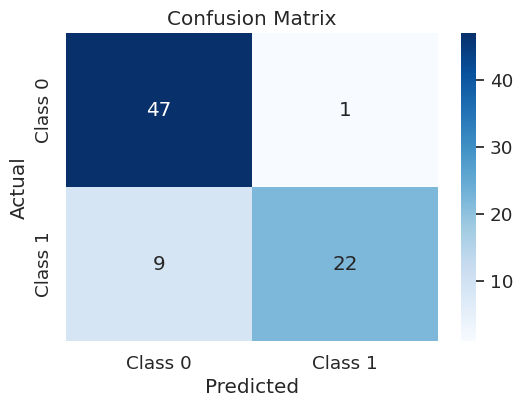

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Replace these values with your own
conf_matrix2 = np.array(conf_matrix)
# conf_matrix = np.array([[33, 4], [17, 9]])
classes = ['Class 0', 'Class 1']

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.set(font_scale=1.2)  # Adjust font size as needed
sns.heatmap(conf_matrix2, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


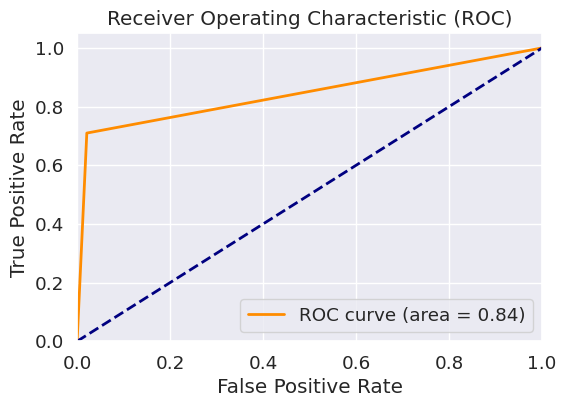

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have y_pred_probs for predicted probabilities and y_test for true labels

# Calculate ROC curve for Class 1 (assuming binary classification)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_binary)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()



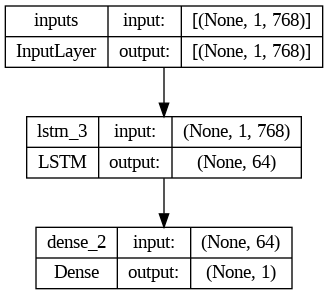

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.utils import plot_model

# Define the input layer
inputs = Input(shape=(1, 768), name='inputs')

# Define the LSTM layer
lstm = LSTM(64, name='lstm_3')(inputs)

# Define the output layer
outputs = Dense(1, name='dense_2')(lstm)

# Create the model
model = Model(inputs=inputs, outputs=outputs)

# Visualize the model
plot_model(model, to_file='lstm_model.png', show_shapes=True)


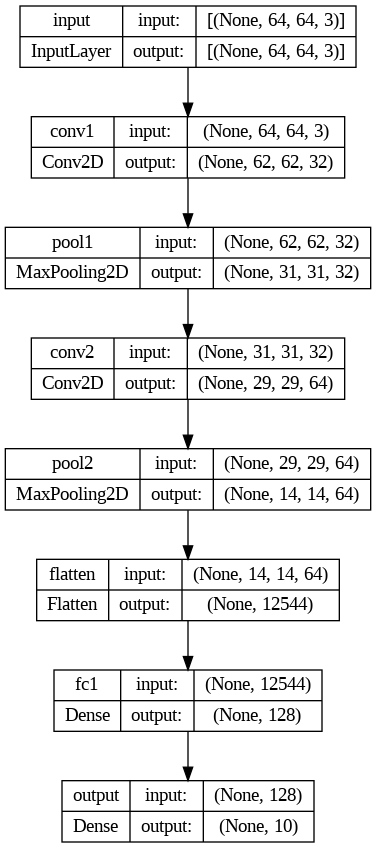

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import plot_model

# Define the input layer
input_layer = Input(shape=(64, 64, 3), name='input')

# Add convolutional layers
conv1 = Conv2D(32, (3, 3), activation='relu', name='conv1')(input_layer)
pool1 = MaxPooling2D((2, 2), name='pool1')(conv1)
conv2 = Conv2D(64, (3, 3), activation='relu', name='conv2')(pool1)
pool2 = MaxPooling2D((2, 2), name='pool2')(conv2)

# Flatten layer
flatten = Flatten(name='flatten')(pool2)

# Fully connected layers
fc1 = Dense(128, activation='relu', name='fc1')(flatten)
output = Dense(10, activation='softmax', name='output')(fc1)

# Create the model
model = Model(inputs=input_layer, outputs=output)

# Visualize the model
plot_model(model, to_file='full_network.png', show_shapes=True)


In [ ]:
from sklearn.model_selection import KFold
import numpy as np

# LSTM Model Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=24)
accuracy_scores = []

for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    Y_train, Y_val = binary_labels[train_index], binary_labels[val_index]

    model = Sequential()
    model.add(embedding_layer)
    model.add(LSTM(units=lstm_out))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    model.fit(X_train, Y_train, epochs=6, verbose=1, batch_size=batch_size)

    score, acc = model.evaluate(X_val, Y_val, verbose=2, batch_size=batch_size)
    accuracy_scores.append(acc)

mean_accuracy = np.mean(accuracy_scores)
print(f"Mean Accuracy over 10 folds: {mean_accuracy}")


Epoch 1/6
23/23 [==============================] - 82s 3s/step - loss: 0.3471 - accuracy: 0.9278
Epoch 2/6
23/23 [==============================] - 59s 3s/step - loss: 0.0411 - accuracy: 0.9915
Epoch 3/6
23/23 [==============================] - 59s 3s/step - loss: 0.0151 - accuracy: 0.9972
Epoch 4/6
23/23 [==============================] - 59s 3s/step - loss: 0.0204 - accuracy: 0.9943
Epoch 5/6
23/23 [==============================] - 59s 3s/step - loss: 0.0196 - accuracy: 0.9943
Epoch 6/6
23/23 [==============================] - 61s 3s/step - loss: 0.0095 - accuracy: 0.9958
3/3 - 1s - loss: 0.4453 - accuracy: 0.9114 - 1s/epoch - 348ms/step


Epoch 1/6
23/23 [==============================] - 66s 3s/step - loss: 0.3439 - accuracy: 0.9504
Epoch 2/6
23/23 [==============================] - 62s 3s/step - loss: 0.0710 - accuracy: 0.9844
Epoch 3/6
23/23 [==============================] - 60s 3s/step - loss: 0.0477 - accuracy: 0.9915
Epoch 4/6
23/23 [==============================] - 62s 3s/step - loss: 0.0459 - accuracy: 0.9901
Epoch 5/6
23/23 [==============================] - 59s 3s/step - loss: 0.0256 - accuracy: 0.9915
Epoch 6/6
23/23 [==============================] - 59s 3s/step - loss: 0.0156 - accuracy: 0.9943
3/3 - 1s - loss: 0.0495 - accuracy: 0.9873 - 836ms/epoch - 279ms/step


Epoch 1/6
23/23 [==============================] - 61s 3s/step - loss: 0.3096 - accuracy: 0.9419
Epoch 2/6
23/23 [==============================] - 59s 3s/step - loss: 0.0322 - accuracy: 0.9929
Epoch 3/6
23/23 [==============================] - 59s 3s/step - loss: 0.0141 - accuracy: 0.9943
Epoch 4/6
23/23 [==============================] - 59s 3s/step - loss: 0.0098 - accuracy: 0.9958
Epoch 5/6
23/23 [==============================] - 60s 3s/step - loss: 0.0083 - accuracy: 0.9943
Epoch 6/6
23/23 [==============================] - 62s 3s/step - loss: 0.0099 - accuracy: 0.9972
3/3 - 1s - loss: 0.0040 - accuracy: 1.0000 - 1s/epoch - 445ms/step


Epoch 1/6
23/23 [==============================] - 66s 3s/step - loss: 0.2829 - accuracy: 0.9490
Epoch 2/6
23/23 [==============================] - 61s 3s/step - loss: 0.0254 - accuracy: 0.9915
Epoch 3/6
23/23 [==============================] - 59s 3s/step - loss: 0.0139 - accuracy: 0.9972
Epoch 4/6
23/23 [==============================] - 58s 3s/step - loss: 0.0136 - accuracy: 0.9958
Epoch 5/6
23/23 [==============================] - 59s 3s/step - loss: 0.0114 - accuracy: 0.9958
Epoch 6/6
23/23 [==============================] - 59s 3s/step - loss: 0.0078 - accuracy: 0.9972


3/3 - 1s - loss: 0.0016 - accuracy: 1.0000 - 839ms/epoch - 280ms/step


Epoch 1/6
23/23 [==============================] - 63s 3s/step - loss: 0.2654 - accuracy: 0.9561
Epoch 2/6
23/23 [==============================] - 59s 3s/step - loss: 0.0211 - accuracy: 0.9986
Epoch 3/6
23/23 [==============================] - 59s 3s/step - loss: 0.0129 - accuracy: 0.9958
Epoch 4/6
23/23 [==============================] - 59s 3s/step - loss: 0.0097 - accuracy: 0.9972
Epoch 5/6
23/23 [==============================] - 59s 3s/step - loss: 0.0072 - accuracy: 0.9958
Epoch 6/6
23/23 [==============================] - 59s 3s/step - loss: 0.0073 - accuracy: 0.9986


3/3 - 1s - loss: 0.0503 - accuracy: 0.9873 - 842ms/epoch - 281ms/step


Epoch 1/6
23/23 [==============================] - 62s 3s/step - loss: 0.2255 - accuracy: 0.9859
Epoch 2/6
23/23 [==============================] - 59s 3s/step - loss: 0.0171 - accuracy: 0.9972
Epoch 3/6
23/23 [==============================] - 59s 3s/step - loss: 0.0116 - accuracy: 0.9958
Epoch 4/6
23/23 [==============================] - 59s 3s/step - loss: 0.0074 - accuracy: 0.9958
Epoch 5/6
23/23 [==============================] - 59s 3s/step - loss: 0.0084 - accuracy: 0.9958
Epoch 6/6
23/23 [==============================] - 59s 3s/step - loss: 0.0078 - accuracy: 0.9958
3/3 - 1s - loss: 0.0015 - accuracy: 1.0000 - 834ms/epoch - 278ms/step


Epoch 1/6
23/23 [==============================] - 61s 3s/step - loss: 0.2207 - accuracy: 0.9505
Epoch 2/6
23/23 [==============================] - 61s 3s/step - loss: 0.0151 - accuracy: 0.9972
Epoch 3/6
23/23 [==============================] - 59s 3s/step - loss: 0.0081 - accuracy: 0.9972
Epoch 4/6
23/23 [==============================] - 59s 3s/step - loss: 0.0071 - accuracy: 0.9958
Epoch 5/6
23/23 [==============================] - 59s 3s/step - loss: 0.0063 - accuracy: 0.9958
Epoch 6/6
23/23 [==============================] - 59s 3s/step - loss: 0.0066 - accuracy: 0.9958
3/3 - 1s - loss: 0.0086 - accuracy: 1.0000 - 845ms/epoch - 282ms/step


Epoch 1/6
23/23 [==============================] - 61s 3s/step - loss: 0.2055 - accuracy: 0.9745
Epoch 2/6
23/23 [==============================] - 59s 3s/step - loss: 0.0096 - accuracy: 0.9972
Epoch 3/6
23/23 [==============================] - 59s 3s/step - loss: 0.0068 - accuracy: 0.9972
Epoch 4/6
23/23 [==============================] - 60s 3s/step - loss: 0.0040 - accuracy: 0.9986
Epoch 5/6
23/23 [==============================] - 60s 3s/step - loss: 0.0044 - accuracy: 0.9986
Epoch 6/6
23/23 [==============================] - 58s 3s/step - loss: 0.0034 - accuracy: 0.9972
3/3 - 1s - loss: 0.0527 - accuracy: 0.9872 - 872ms/epoch - 291ms/step


Epoch 1/6
23/23 [==============================] - 63s 3s/step - loss: 0.1983 - accuracy: 0.9887
Epoch 2/6
23/23 [==============================] - 60s 3s/step - loss: 0.0109 - accuracy: 0.9972
Epoch 3/6
23/23 [==============================] - 62s 3s/step - loss: 0.0060 - accuracy: 0.9986
Epoch 4/6
23/23 [==============================] - 63s 3s/step - loss: 0.0050 - accuracy: 0.9986
Epoch 5/6
23/23 [==============================] - 61s 3s/step - loss: 0.0038 - accuracy: 0.9986
Epoch 6/6
23/23 [==============================] - 60s 3s/step - loss: 0.0046 - accuracy: 0.9986
3/3 - 1s - loss: 0.0412 - accuracy: 0.9872 - 1s/epoch - 390ms/step


Epoch 1/6
23/23 [==============================] - 62s 3s/step - loss: 0.2082 - accuracy: 0.9576
Epoch 2/6
23/23 [==============================] - 60s 3s/step - loss: 0.0150 - accuracy: 0.9958
Epoch 3/6
23/23 [==============================] - 59s 3s/step - loss: 0.0083 - accuracy: 0.9958
Epoch 4/6
23/23 [==============================] - 59s 3s/step - loss: 0.0071 - accuracy: 0.9958
Epoch 5/6
23/23 [==============================] - 59s 3s/step - loss: 0.0061 - accuracy: 0.9972
Epoch 6/6
23/23 [==============================] - 59s 3s/step - loss: 0.0061 - accuracy: 0.9972
3/3 - 1s - loss: 7.8398e-04 - accuracy: 1.0000 - 973ms/epoch - 324ms/step
Mean Accuracy over 10 folds: 0.9860434830188751


In [ ]:
!pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 25.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics.pairwise import cosine_similarity

# Sample data
df = pd.read_csv("/content/drive/MyDrive/Saddam_Sir/Thesis/Dataset/LIWC_results_GNN.csv")
# df = pd.read_csv(r"D:\Research\Saddam Sir\Jabin Apu\Main Dataset\LIWC OUTPUT\LIWC results GNN.csv")

y = df.iloc[:,0].values
X = df.iloc[:,1:].values

In [ ]:
df

,ID,WC,WPS,Qmarks,Unique,Dic,Sixltr,funct,pronoun,ppron,...,achieve,leisure,home,money,relig,death,assent,nonfl,filler,Class
0,1,144,24.00,0.00,63.89,82.64,40.97,41.67,6.25,4.17,...,2.78,1.39,0.69,0.69,0.00,1.39,0.0,0.0,0.0,1
1,2,121,20.17,0.00,66.12,71.07,27.27,35.54,9.92,8.26,...,0.00,1.65,0.83,0.00,0.00,4.13,0.0,0.0,0.0,1
2,3,125,15.62,0.00,67.20,70.40,24.00,42.40,11.20,9.60,...,0.80,2.40,1.60,0.80,0.00,1.60,0.0,0.0,0.0,1
3,4,57,14.25,1.75,85.96,73.68,24.56,33.33,10.53,3.51,...,1.75,5.26,3.51,1.75,0.00,7.02,0.0,0.0,0.0,0
4,5,173,17.30,1.16,60.12,91.91,10.40,59.54,19.65,14.45,...,0.58,0.58,0.00,0.00,0.00,1.73,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,525,8,8.00,0.00,100.00,100.00,12.50,62.50,12.50,12.50,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,1
525,526,13,6.50,7.69,100.00,92.31,30.77,46.15,7.69,0.00,...,7.69,0.00,0.00,0.00,15.38,7.69,0.0,0.0,0.0,1
526,527,7,7.00,14.29,100.00,100.00,14.29,57.14,14.29,14.29,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,1
527,528,23,23.00,0.00,86.96,69.57,30.43,39.13,4.35,4.35,...,4.35,0.00,0.00,4.35,0.00,0.00,0.0,0.0,0.0,0


In [ ]:
y
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.82941176, 0.27631579, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.69411765, 0.22592105, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.71764706, 0.16605263, 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.02352941, 0.05263158, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.11764706, 0.26315789, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02352941, 0.05263158, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
# KNN graph
import networkx as nx
knn_graph = kneighbors_graph(X, n_neighbors=2, mode='connectivity', include_self=False)

# Cosine similarity (can use other similarity metrics)
cos_sim = cosine_similarity(X)

# Create networkx graph
import numpy as np

adj = knn_graph.toarray()
G = nx.from_numpy_array(adj)

# Add edge weights
for i, j in G.edges():
    G[i][j]['weight'] = cos_sim[i, j]

print(G.nodes())
print(G.edges(data=True)) # view edges with weights

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [ ]:
import torch
from torch_geometric.nn import GCNConv
from torch_geometric.utils import add_self_loops
num_nodes = X.shape[0]

num_nodes = X.shape[0]
edge_index = torch.zeros(2, num_nodes, dtype=torch.long)
edge_index[0] = torch.arange(num_nodes)
edge_index[1] = torch.arange(num_nodes)

edges = list(G.edges())
num_edges = len(edges)
graph_edges = torch.zeros(2, num_edges, dtype=torch.long)
graph_edges[0] = torch.from_numpy(np.array(edges)[:,0])
graph_edges[1] = torch.from_numpy(np.array(edges)[:,1])

edge_index = torch.cat([edge_index, graph_edges], dim=-1)

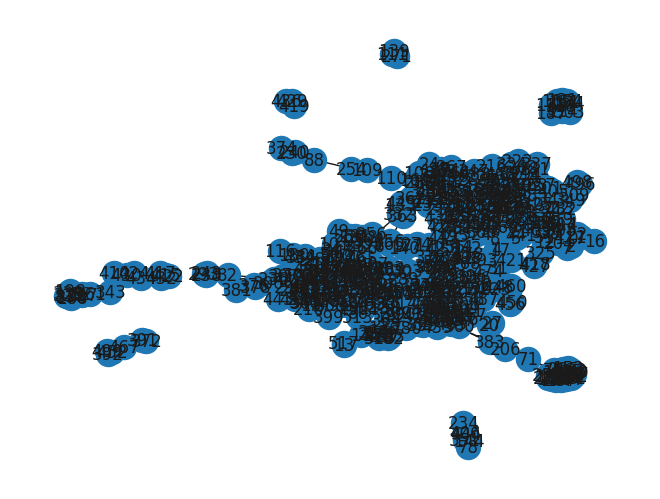

In [ ]:
import matplotlib.pyplot as plt

# ...create graph G

plt.figure()
nx.draw(G, with_labels=True)
plt.show()

In [ ]:
print("Nodes:", G.number_of_nodes())

Nodes: 529


In [ ]:
print("Edges:", G.number_of_edges())

Edges: 885


In [ ]:
if G.is_directed():
    print("Directed graph")
else:
    print("Undirected graph")

Undirected graph


In [ ]:
density = nx.density(G)
print("Density:", density)

Density: 0.0063369994844475


In [ ]:
deg = nx.degree_histogram(G)
print("Degree distribution:")
print(deg)

Degree distribution:
[0, 0, 263, 110, 64, 39, 20, 11, 4, 6, 4, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class TabularGNN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(TabularGNN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return x.log_softmax(dim=1)

In [ ]:
model = TabularGNN(X.shape[1], 64, y.max()+1)

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.NLLLoss()

In [ ]:
y_np = df['Class'].values
y = torch.from_numpy(y_np).long()
x = torch.from_numpy(X)

In [ ]:
# Cast inputs to double
x = x.double()
edge_index = edge_index.long()

# Cast model parameters
model.double()

TabularGNN(
  (conv1): GCNConv(71, 64)
  (conv2): GCNConv(64, 530)
)

In [ ]:
for epoch in range(200):
    out = model(x, edge_index)
    loss = criterion(out, y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

# Test accuracy
_, pred = model(x, edge_index).max(dim=1)
acc = pred.eq(y).sum().item() / len(y)
print('Test accuracy: ', acc)

Test accuracy:  1.0


In [ ]:
!pip install dgl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 16.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux20

In [ ]:
import dgl
import torch
import torch.nn as nn
import torch.optim as optim
from dgl.nn import GraphConv
from sklearn.model_selection import KFold

# Assume `graph_data` and `labels` are your graph dataset and labels respectively
# This part should be modified according to your actual graph data preparation

class GNN(nn.Module):
    def __init__(self, in_feats, h_feats, num_classes):
        super(GNN, self).__init__()
        self.conv1 = GraphConv(in_feats, h_feats)
        self.conv2 = GraphConv(h_feats, num_classes)

    def forward(self, g, in_feat):
        h = self.conv1(g, in_feat)
        h = torch.relu(h)
        h = self.conv2(g, h)
        return h

# Prepare your graph data and features
# Assume graph_data is your DGL graph and features and labels are prepared accordingly

accuracy_scores = []

kf = KFold(n_splits=10, shuffle=True, random_state=24)

for train_index, val_index in kf.split(X):
    train_graphs = [graph_data[i] for i in train_index]
    val_graphs = [graph_data[i] for i in val_index]
    train_labels = [labels[i] for i in train_index]
    val_labels = [labels[i] for i in val_index]

    model = GNN(in_feats=num_features, h_feats=64, num_classes=2)
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    loss_fn = nn.CrossEntropyLoss()

    for epoch in range(50):  # Training for 50 epochs
        model.train()
        for g, label in zip(train_graphs, train_labels):
            features = g.ndata['feat']
            logits = model(g, features)
            loss = loss_fn(logits, label)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    model.eval()
    correct = 0
    total = 0
    for g, label in zip(val_graphs, val_labels):
        features = g.ndata['feat']
        logits = model(g, features)
        _, predicted = torch.max(logits, 1)
        total += label.size(0)
        correct += (predicted == label).sum().item()

    accuracy_scores.append(correct / total)

mean_accuracy = np.mean(accuracy_scores)
print(f"Mean Accuracy over 10 folds: {mean_accuracy}")


ImportError: cannot import name 'DILL_AVAILABLE' from 'torch.utils.data.datapipes.utils.common' (/usr/local/lib/python3.10/dist-packages/torch/utils/data/datapipes/utils/common.py)

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming y_pred_gnn and y_pred_lstm are the predicted probabilities from GNN and LSTM models
y_pred_ensemble = (pred + y_pred_binary) / 2  # Simple averaging

# Adjust threshold if needed
threshold = 0.5
y_pred_ensemble_binary = np.where(y_pred_ensemble >= threshold, 1, 0)

# Convert y_test to binary format if it's one-hot encoded
if len(y_test.shape) > 1 and y_test.shape[1] > 1:  # Check if y_test is one-hot encoded
    y_test_binary = np.argmax(y_test, axis=1)
else:
    y_test_binary = y_test

# Ensure y_test_binary and y_pred_ensemble_binary are of the same shape
# (assuming they are 1D arrays)
y_test_binary = np.squeeze(y_test_binary)

# Take only the predictions for the positive class (assuming 1 is the positive class)
y_pred_ensemble_binary = y_pred_ensemble_binary[:, 1]

# Calculate accuracy, confusion matrix, and classification report
ensemble_accuracy = accuracy_score(y_test_binary, y_pred_ensemble_binary)
ensemble_conf_matrix = confusion_matrix(y_test_binary, y_pred_ensemble_binary)
ensemble_report = classification_report(y_test_binary, y_pred_ensemble_binary)

print("Ensemble Accuracy:", ensemble_accuracy)
print("Ensemble Confusion Matrix:\n", ensemble_conf_matrix)
print("Ensemble Classification Report:\n", ensemble_report)

Ensemble Accuracy: 0.3924050632911392
Ensemble Confusion Matrix:
 [[ 0 48]
 [ 0 31]]
Ensemble Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        48
           1       0.39      1.00      0.56        31

    accuracy                           0.39        79
   macro avg       0.20      0.50      0.28        79
weighted avg       0.15      0.39      0.22        79



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


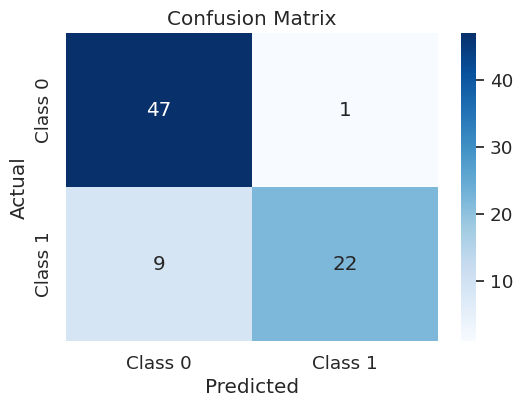

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Replace these values with your own
conf_matrix2 = np.array(conf_matrix)
# conf_matrix = np.array([[ 0 37][ 0 19]])
classes = ['Class 0', 'Class 1']

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.set(font_scale=1.2)  # Adjust font size as needed
sns.heatmap(conf_matrix2, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming y_pred_gnn and y_pred_lstm are the predicted probabilities from GNN and LSTM models
y_pred_ensemble = (pred + y_pred_binary) / 2  # Simple averaging

# Adjust threshold if needed
threshold = 0.5
y_pred_ensemble_binary = np.where(y_pred_ensemble >= threshold, 1, 0)

# Convert y_test to binary format if it's one-hot encoded
if len(y_test.shape) > 1 and y_test.shape[1] > 1:  # Check if y_test is one-hot encoded
    y_test_binary = np.argmax(y_test, axis=1)
else:
    y_test_binary = y_test

# Ensure y_test_binary and y_pred_ensemble_binary are of the same shape
# (assuming they are 1D arrays)
y_test_binary = np.squeeze(y_test_binary)

# Check for multilabel-indicator targets
if len(np.unique(y_test_binary)) > 2:
    y_test_binary = (y_test_binary > 0).astype(int)
    y_pred_ensemble_binary = (y_pred_ensemble_binary > 0).astype(int)

# Calculate accuracy, confusion matrix, and classification report
ensemble_accuracy = accuracy_score(y_test_binary, y_pred_ensemble_binary)
ensemble_conf_matrix = confusion_matrix(y_test_binary, y_pred_ensemble_binary)
ensemble_report = classification_report(y_test_binary, y_pred_ensemble_binary)

print("Ensemble Accuracy:", ensemble_accuracy)
print("Ensemble Confusion Matrix:\n", ensemble_conf_matrix)
print("Ensemble Classification Report:\n", ensemble_report)

ValueError: Classification metrics can't handle a mix of binary and multilabel-indicator targets